In [1]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import pickle

In [12]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)
    
img = x_train[22]
label = t_train[22]
print(label)

9


In [13]:
from PIL import Image
import numpy as np

この画像データのラベルは9です


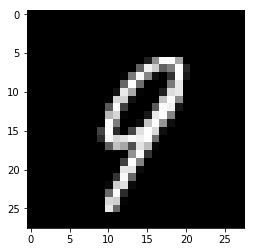

In [14]:
import matplotlib.pyplot as plt
% matplotlib inline
 
plt.imshow(img.reshape(28, 28), cmap='gray')
print("この画像データのラベルは{:.0f}です".format(label))

In [15]:
# 2. DataLoderの作成
 
import torch
from torch.utils.data import TensorDataset, DataLoader

In [32]:
# 2.2 データをPyTorchのTensorに変換
X_train = torch.Tensor(x_train)
X_test = torch.Tensor(x_test)
y_train = torch.LongTensor(t_train)
y_test = torch.LongTensor(t_test)

In [33]:
# 2.3 データとラベルをセットにしたDatasetを作成
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

In [34]:
# 2.4 データセットのミニバッチサイズを指定した、Dataloaderを作成
# Chainerのiterators.SerialIteratorと似ている
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [35]:
# 3. ネットワークの構築
# Keras風の書き方 Define and Run
 
from torch import nn
 
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
 
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [36]:
# 4. 誤差関数と最適化手法の設定
 
from torch import optim
 
# 誤差関数の設定
loss_fn = nn.CrossEntropyLoss()  # 変数名にはcriterionも使われる
 
# 重みを学習する際の最適化手法の選択
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [37]:
# 5. 学習と推論の設定
# 5-1. 学習1回でやることを定義します
# Chainerのtraining.Trainer()に対応するものはない
 
from torch.autograd import Variable
 
 
def train(epoch):
    model.train()  # ネットワークを学習モードに切り替える
 
    # データローダーから1ミニバッチずつ取り出して計算する
    for data, target in loader_train:
        data, target = Variable(data), Variable(target)  # 微分可能に変換
        optimizer.zero_grad()  # 一度計算された勾配結果を0にリセット
 
        output = model(data)  # 入力dataをinputし、出力を求める
        loss = loss_fn(output, target)  # 出力と訓練データの正解との誤差を求める
        loss.backward()  # 誤差のバックプロパゲーションを求める
        optimizer.step()  # バックプロパゲーションの値で重みを更新する
 
    print("epoch{}：終了\n".format(epoch))

In [38]:
# 5. 学習と推論の設定
# 5-2. 推論1回でやることを定義します
# Chainerのtrainer.extend(extensions.Evaluator())に対応するものはない
 
 
def test():
    model.eval()  # ネットワークを推論モードに切り替える
    correct = 0
 
    # データローダーから1ミニバッチずつ取り出して計算する
    for data, target in loader_test:
        data, target = Variable(data), Variable(target)  # 微分可能に変換
        output = model(data)  # 入力dataをinputし、出力を求める
 
        # 推論する
        pred = output.data.max(1, keepdim=True)[1]  # 出力ラベルを求める
        correct += pred.eq(target.data.view_as(pred)).sum()  # 正解と一緒だったらカウントアップ
 
    # 正解率を出力
    data_num = len(loader_test.dataset)  # データの総数
    print('\nテストデータの正解率: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

In [39]:
# 学習なしにテストデータで推論してみよう
test()


テストデータの正解率: 1495/10000 (14%)



In [40]:
# 6. 学習と推論の実行
for epoch in range(3):
    train(epoch)
 
test()

epoch0：終了

epoch1：終了

epoch2：終了


テストデータの正解率: 8972/10000 (89%)



予測結果はtensor([ 7])
この画像データの正解ラベルは1です


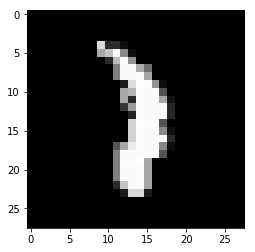

In [28]:
# 例えば2018番目の画像データを推論してみる
 
index = 2018
 
model.eval()  # ネットワークを推論モードに切り替える
data = Variable(X_test[index])
output = model(data)  # 入力dataをinputし、出力を求める
 
pred = output.data.max(0, keepdim=True)[1]  # 出力ラベルを求める
 
print("予測結果は{}".format(pred))
 
 
X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("この画像データの正解ラベルは{:.0f}です".format(y_test[index]))